# Import Libraries and Read the Dataset:

In [250]:
import numpy as np
import pandas as pd
import math
import re
import string
from collections import Counter
import matplotlib.pyplot as plt

path = "moviereviews.csv"
df = pd.read_csv(path)

# Exploratory Data Analysis:
    1. Handling Null Values
    2. Handling Duplicate Values


In [251]:
df.isna().any()
df.isna().sum()
df['review'].nunique()

13

In [252]:
df['review'].drop_duplicates(inplace = True)
df['review'].nunique()
print(f"Total unique reviews: {unique_review_count}")

Total unique reviews: 13


In [253]:
df.shape

(13, 2)

In [254]:
df.describe()

,movie,review
count,13,13
unique,13,13
top,The Lord of the Rings The Two Towers,remarkable display of fantasy action powerful ...
freq,1,1


In [255]:
original_rows = df.shape[0]
df.drop_duplicates(subset='review', inplace=True)
remaining_rows = df.shape[0]

if remaining_rows < original_rows:
    print("Duplicates have been dropped.")
else:
    print("No duplicates found.")

No duplicates found.


In [256]:
df.drop_duplicates(subset='review', inplace=True)
total_rows = len(df)
print("Total rows after dropping duplicates:", total_rows)

Total rows after dropping duplicates: 13


# Adding all the reviews to one variable


##  Data preprocessing

In [257]:
all_text = ' '.join(df['review'].values)
all_text = re.sub(r'http\S+', '', all_text)
all_text = re.sub(r'@\S+', '', all_text)
all_text = re.sub(r'#\S+', '', all_text)

# Split the text into individual words

In [258]:
words = all_text.split()

# count frequency of words repeated overall

In [259]:
word_counts = Counter(words)
top_words = word_counts.most_common(100)
top_words

[('love', 6),
 ('action', 5),
 ('of', 4),
 ('fight', 4),
 ('romance', 3),
 ('life', 3),
 ('movie', 3),
 ('ring', 2),
 ('destroy', 2),
 ('violence', 2),
 ('emotional', 2),
 ('amazing', 2),
 ('in', 2),
 ('friendship', 2),
 ('comedy', 2),
 ('blossoming', 2),
 ('brutal', 2),
 ('remarkable', 1),
 ('display', 1),
 ('fantasy', 1),
 ('powerful', 1),
 ('hobbit', 1),
 ('it', 1),
 ('implanting', 1),
 ('stealing', 1),
 ('idea', 1),
 ('gripping', 1),
 ('jaw', 1),
 ('dropping', 1),
 ('stunning', 1),
 ('visual', 1),
 ('mind', 1),
 ('bending', 1),
 ('wild', 1),
 ('sequences', 1),
 ('intimate', 1),
 ('moments', 1),
 ('Best', 1),
 ('live', 1),
 ('portrayal', 1),
 ('beat', 1),
 ('organized', 1),
 ('crime', 1),
 ('Gotham', 1),
 ('enigmatic', 1),
 ('villain', 1),
 ('brutality', 1),
 ('mesmerising', 1),
 ('turned', 1),
 ('profound', 1),
 ('unconventional', 1),
 ('bond', 1),
 ('heartfelt', 1),
 ('Romantic', 1),
 ('screwball', 1),
 ('enduring', 1),
 ('tale', 1),
 ('comical', 1),
 ('true', 1),
 ('Neighbors', 1

# Create a bar chart of the most common words

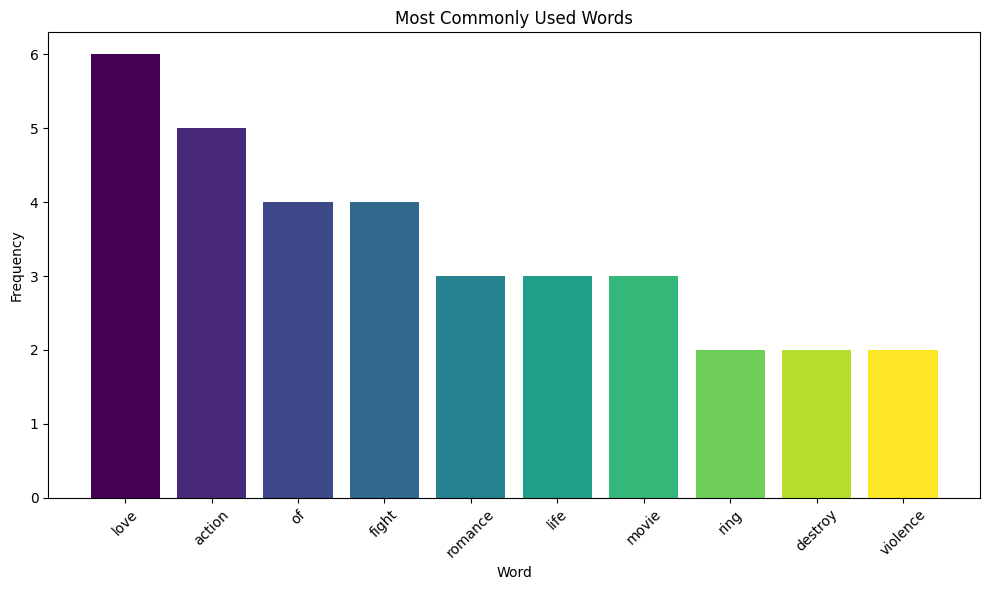

In [260]:
top_words = word_counts.most_common(10) 
x_values = [word[0] for word in top_words]
y_values = [word[1] for word in top_words]

colors = plt.cm.viridis(np.linspace(0, 1, len(x_values)))
plt.figure(figsize=(10, 6))
plt.bar(x_values, y_values, color=colors)
plt.xlabel('Word')
plt.ylabel('Frequency')
plt.title('Most Commonly Used Words')
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig('effective_frequency_words_bar_chart.png')  # Save the effective bar chart image
plt.show()

# New dictionary to store movie review vectors

In [261]:
vectors = {}

#  Calculate review vectors for each movie

In [262]:
for _, row in df.iterrows():
    movie = row["movie"]
    review = row["review"].split()
    vector = np.random.rand(300)  # Simulated word embeddings
    vectors[movie] = vector
    #since words are split, lets 

# Calculate similarity between pairs of movies using dot product ![data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAAAWUAAAB/CAMAAAAAYSPAAAAAMFBMVEX///8AAAAQEBCJiYnv7++7u7vNzc3d3d0iIiKZmZlUVFSrq6syMjJmZmZ2dnZEREREOolsAAAGBElEQVR4nO2d25arIA`xAK6KgePn/vz1FPYrKJQgUHbOfZlZHpt0qJIDp5/MQhiIOXe4PcmvaSJaLOvcnuTPKtcwdkC9my23uT3Jr+OpJwA6grBbN0PKjZpr2fT4btnlinkeKXlU9pHl/f4Rm9XRhBKPlKprEf2t/iTbscqz75egm9hv7U9BtTKsuNcDaq7fCm6hXy+TiEFZzDOaclKvm8WoTPQZzTrpVc3m1iQaDORdK13z5thc5grmRrz/WxP/fBx7ui1gtc/cfGyh9grmBhPbiUwvKVdFceOuBh3vTr5qv966tRzDHgwM/2QJVwiKvkzwTePgFvDPtM5TALwdyfQRQWnic5euZ9kYJ79Vfajks017owCPIWy2HZtp+vNZycKbtw2stR8i04bzXcoxMG8qLLcfItIG82XKMTBvGmy1HybRBvNpylEwbwrstx8i0IbzccoxMG8DLLUfJtN283fJvMu3XW/5Jpv0jy2VHim6ZyWY9KXirfqScln+Saess25XoWnBoEoSXVdMVXI4wVTE2tRiLfns9q+VfZNpnyy4luhbsmsplPaaTr1TzL4MaO+W1/INM+2TZqUTXglVT8/81ue5LSTm3XihnLrPl9Jn20bJbia4Fmya2rix+/4q0Uy479YW3sZw+0z5YBijRtWDT1G293Zpj1fvrxscyq914JxipM+2DZYASXQsWTWJLqqZEa/6xJ1wZUT0sA59Z8I0Wtkw7yV7OvWWIEl0LFk3KeatM14qH5dLyGMIG97WcONPeW4Yo0bVg1sSUcbM0XSq5++VP6kx7ZxmkRNeCWVOljCet6Uq5geW0mfbOMkjJh3VE7UDgGTYxPShwB8tJM21jhm1UIgO7dveHQMvM2AfdwbKaaUdv22TZrESOx2pXArbcGPugW1jeHgb8nWWzkk/d714AWzb3QfewvGba8RNAk2WzEl0LIE3ceJXcxPLSNSdYmzJZNivRtQDRRM190E0sz5l2ihkjg2WLEl0LEE3C3Adlz7AXkj2UY7BsUaJrAaKpN/d4+TPs5V+nWv0zWLYo0bUA0SSnCrbfBnX6KX+GLRFXD3RjsGxSUnWEHw4AWpZ9kLIWQcr9a/n7ZRkvk0TbBfSWTUoEr7+X+f4IoGWxy13FLoC5g+UpwEi1vqq3bFBSyxvqqMFqmbZFNx/c7nr6bjfI3MFyBx+J/FEtO5V0Yn7t1IJR07rMQneR6P5SvoPlsUi5IUO17FJSTZ//uGxjs7wtswyk3U4cJfsbKL/lIVUMN6NYdipp5Q/iGLc7LctzxArB1mUtyg9L8tktN8liuJmjZZsSIcOc8RiMWnuM7yAqA0JG+ik6nG4Kxo8fKLdluWKR9OEStceAKGGnvSFWy1XBm7ouyXTK2oI0ddOeV2ozW2ZppogUVMsQJcMp3HGsSA28IOPyYjWSgvfnmDSvZcoTxnAz+xUptxJykvDw3YjzoJ/48R3P3YiashBPt9wWtt0mcfC0PM7dtToF+3DLZXG75/3o/I6ompc823LCKSIFP8vNnKyU6h32aMspp4gU/Cwv2fXufT3ZMiOpY7gZP8vDlF33uwHwyZZ50DIfBd8Efpa/8Tul/X6weLDlwCkiAg5NPGOM+vIsvo1MlgOX+bCiDoTAZT6sDgUhdIpo9DD3WsvrDORFSp+F8jiWn1a1L3yZr/Hq0uNU7XtYBcpP8DJf6XeO+uAKlOEtZCBsiojKw7Fmu4shaIqomXbe4PcPOJDLfJd7/3rZgJt+9uPZhMRwYlw2iWFdfDvXp4gqZS8kfseDFXppioiJYSxUsF67FdmttsyN3AhdCdGUfdudN5ridw9YifS1aOkrsD6Z0i0QAgbLNoRbIAgMli0wtz8YGCxbaNz+QGCwjCAIgiAIgiAIgiAIgiAIgiDZONQyRZLQ4V6AH8Bx89APONQyRRAEQRAECUZTyxSJja6WKRIZbS1TJDLaWqZIXPS1TJG46GuZInHR1zJF4nOuZYrE51zLFInPuZYpEh1NLVMkOppapkhsdLVMkdjoapkisdHVMkVio6tlisRGV8sUiY6mlukt+AcPiS5wABuczAAAAABJRU5ErkJggg==](attachment:image.png)
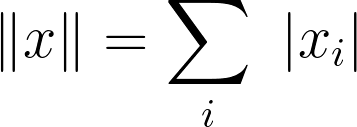

In [263]:
similar_pairs = []

for movie1, vector1 in vectors.items():
    for movie2, vector2 in vectors.items():
        if movie1 != movie2:
            similarity = np.dot(vector1, vector2) / (np.linalg.norm(vector1) * np.linalg.norm(vector2))
            similar_pairs.append((movie1, movie2, similarity))

# Sort the similar pairs by similarity

In [264]:
similar_pairs.sort(key=lambda x: x[2], reverse=True)

In [265]:
top_similar_pairs = similar_pairs[:5]

for pair in top_similar_pairs:
    movie1 = pair[0]
    movie2 = pair[1]
    similarity_score = pair[2]
    print(f"{movie1} and {movie2} are very much alike with a similarity score of {similarity_score:.4f}")

In the Mood for Love and Lawrence of Arabia are very much alike with a similarity score of 0.7812
Lawrence of Arabia and In the Mood for Love are very much alike with a similarity score of 0.7812
It happened one night and Gone with the wind are very much alike with a similarity score of 0.7764
Gone with the wind and It happened one night are very much alike with a similarity score of 0.7764
Eternal Sunshine of the Spotless Mind and Raging Bull are very much alike with a similarity score of 0.7758


# Graph for the top 5 similar movie pairs

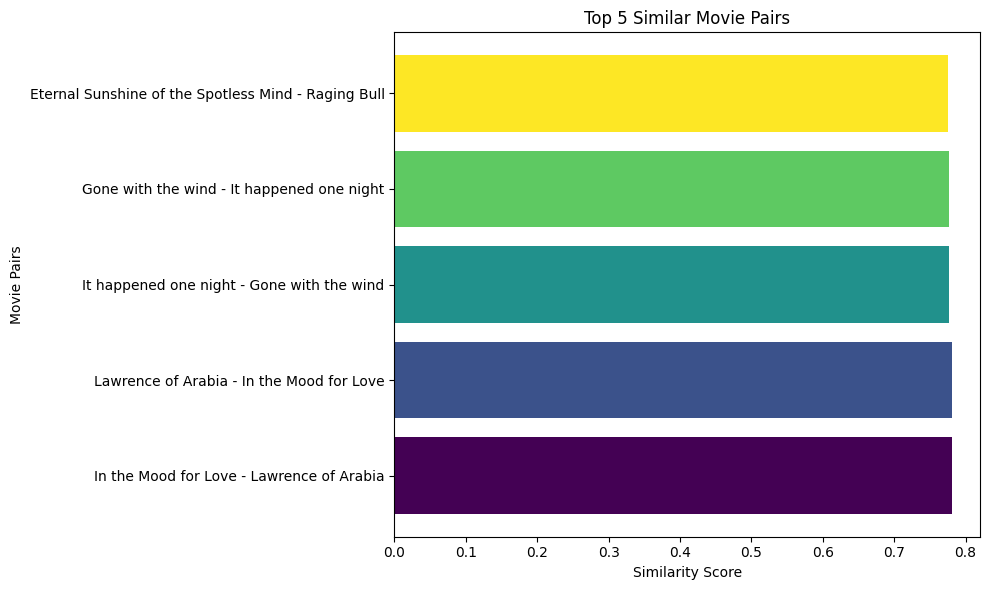

In [266]:
pairs = [f"{pair[0]} - {pair[1]}" for pair in top_similar_pairs]
scores = [pair[2] for pair in top_similar_pairs]
colors = plt.cm.viridis(np.linspace(0, 1, len(pairs)))
plt.figure(figsize=(10, 6))
plt.barh(pairs, scores, color=colors)
plt.xlabel('Similarity Score')
plt.ylabel('Movie Pairs')
plt.title('Top 5 Similar Movie Pairs')
plt.tight_layout()
plt.savefig('similarity_bar_chart.png') 
plt.show()